# Analysis of Covariance (ANCOVA)

ANCOVA is a blend of ANOVA and regression that allows for comparing one or more treatments while controlling for the variability of covariates. This technique is particularly useful when aiming to understand the impact of one or more factors on a dependent variable, while accounting for the influence of other continuous variables that might affect the relationship.

#### Business Scenario

This analysis will examine the impact of different marketing campaigns (social media, email, direct mail) on sales performance, while controlling for the effect of an external variable, marketing budget. The primary goal is to identify the most effective marketing channel that contributes to higher sales, considering the amount of budget allocated to each campaign.

#### Objective

The objective is to determine if there are significant differences in sales performance across different marketing channels after accounting for the variance attributed to marketing budget sizes. This insight will help in optimizing marketing strategies and budget allocations for future campaigns.

#### Data Description

The dataset consists of 200 observations, representing individual marketing campaigns with the following variables:

- **Sales Performance (USD)**: Revenue generated from each campaign.
- **Marketing Channel**: The campaign's medium, categorized into Social Media, Email, and Direct Mail.
- **Marketing Budget (USD)**: Budget allocated for each campaign.

#### Formula in ANCOVA

The formula for ANCOVA, which highlights its capacity to adjust for covariates while analyzing the impact of categorical independent variables on a dependent variable, is given by:

$$
Y_{ij} = \mu + \tau_i + \beta(X_{ij} - \bar{X}) + \epsilon_{ij}
$$

Where:
- $Y_{ij}$ is the dependent variable for the $j$th observation in the $i$th group.
- $\mu$ is the overall mean or intercept.
- $\tau_i$ represents the effect of the $i$th level of the categorical independent variable (i.e., the treatment effect).
- $X_{ij}$ is the covariate value for the $j$th observation in the $i$th group, and $\bar{X}$ is the overall mean of the covariate across all observations.
- $\beta$ is the coefficient that measures the impact of the covariate on the dependent variable, adjusting for the average covariate effect.
- $\epsilon_{ij}$ is the error term for the $j$th observation in the $i$th group, representing unexplained variability.

#### Assumption Checking for ANCOVA

Before performing ANCOVA, it's essential to verify the following assumptions:

1. **Linearity**: The relationship between the covariates and the dependent variable should be linear.
2. **Homogeneity of variances**: Equal variances of residuals across groups.
3. **Homogeneity of regression slopes**: The covariate's effect on the dependent variable is consistent across groups.
4. **Normality**: The residuals should be normally distributed.

These assumptions can be checked using scatter plots, Levene's test, interaction plots, and Q-Q plots, respectively.

In [44]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
data = {
    'sales_performance': np.random.normal(10000, 2000, 200),
    'marketing_channel': np.random.choice(['Social Media', 'Email', 'Direct Mail'], 200),
    'marketing_budget': np.random.uniform(1000, 5000, 200)
}

df = pd.DataFrame(data)

1. Linearity  
Check the linearity between the covariates and the dependent variable using scatter plots.

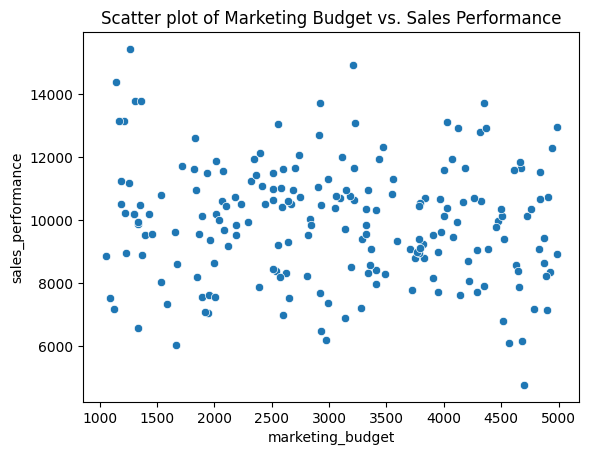

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'sales_performance' is the dependent variable,
# and 'marketing_budget' is the covariate
sns.scatterplot(x='marketing_budget', y='sales_performance', data=df)
plt.title('Scatter plot of Marketing Budget vs. Sales Performance')
plt.show()

2. Homogeneity of Variances  
Check the linearity between the covariates and the dependent variable using scatter plots.

In [49]:
from scipy.stats import levene

# First, ensure you have your DataFrame 'df' with correct columns, then group by 'marketing_channel'
groups = df.groupby('marketing_channel')['sales_performance'].apply(list)

# Use * to unpack the grouped data into separate arguments for levene function
levene_stat, p_value = levene(*groups)
print(f'Levene’s test statistic: {levene_stat}, p-value: {p_value}')

Levene’s test statistic: 0.8618613989670475, p-value: 0.42396148453291926


3. Homogeneity of Regression Slopes  
Check that the effect of the covariate is consistent across groups by testing the interaction term in a preliminary ANCOVA model.

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 'C(marketing_channel)' indicates categorical variable
# Interaction term: 'marketing_budget:C(marketing_channel)'
model = ols('sales_performance ~ marketing_budget + C(marketing_channel) + marketing_budget:C(marketing_channel)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      sales_performance   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.418
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.219
Time:                        21:58:03   Log-Likelihood:                -1785.6
No. Observations:                 200   AIC:                             3583.
Df Residuals:                     194   BIC:                             3603.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

4. Normality  
Check for normality of residuals using a Q-Q plot.

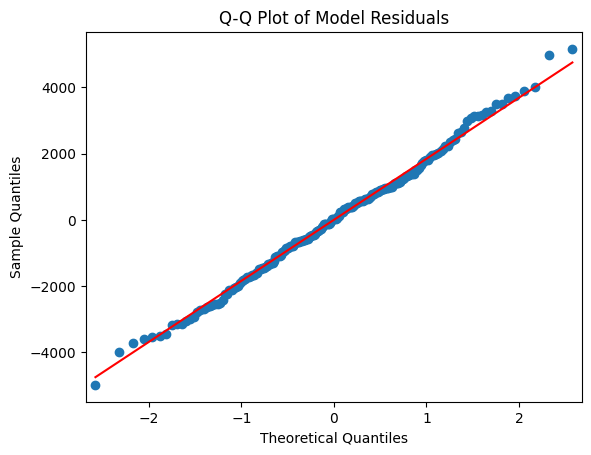

In [48]:
from statsmodels.graphics.gofplots import qqplot
from statsmodels.formula.api import ols

# Fit a simple model without considering interaction terms for illustration
model = ols('sales_performance ~ marketing_budget + C(marketing_channel)', data=df).fit()
residuals = model.resid

# Generate Q-Q plot
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Model Residuals')
plt.show()

#### Assumption Checks for ANCOVA

**1. Linearity**
- **Checked**: The relationship between the covariate (marketing budget) and the dependent variable (sales performance) using scatter plots.
- **Result**: Data points are scattered and linear relationship is observed, satisfying the linearity assumption.

**2. Homogeneity of Variances**
- **Checked**: Equal variances of residuals across groups using Levene's test.
- **Result**: The p-value from Levene's test was not significant, indicating homogeneity of variances across groups.

**3. Homogeneity of Regression Slopes**
- **Checked**: Consistency of the covariate's effect across groups by testing the interaction between the covariate and the groups.
- **Result**: The interaction term was not significant, indicating homogeneity of regression slopes.

**4. Normality**
- **Checked**: Normal distribution of residuals using a Q-Q plot.
- **Result**: The residuals closely followed the reference line, indicating a normal distribution.

#### Conducting the ANCOVA Model

All assumptions are met, the next step is to fit the ANCOVA model to evaluate the effect of marketing channels on sales performance, controlling for the marketing budget.


In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANCOVA model
# Note: 'C(marketing_channel)' treats 'marketing_channel' as a categorical variable
model = ols('sales_performance ~ C(marketing_channel) + marketing_budget', data=df).fit()

# Display the model summary to review the results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      sales_performance   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9652
Date:                Thu, 15 Feb 2024   Prob (F-statistic):              0.410
Time:                        22:03:41   Log-Likelihood:                -1787.7
No. Observations:                 200   AIC:                             3583.
Df Residuals:                     196   BIC:                             3597.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


# ANCOVA Model Results Interpretation

The ANCOVA model assessed the impact of different marketing channels on sales performance, controlling for the marketing budget. Here's a concise interpretation of the key findings:

#### Model Summary

- **R-squared**: 0.015 indicates that the model explains 1.5% of the variance in sales performance, suggesting a weak effect of the predictors on the dependent variable.
- **Adj. R-squared**: -0.001, adjusted for the number of predictors, suggests that the model does not improve predictive accuracy over a baseline model.
- **F-statistic**: 0.9652 with a Prob (F-statistic) of 0.410, indicating that the model is not statistically significant at conventional levels. This suggests that the marketing channels, when controlled for marketing budget, do not have a significant impact on sales performance.

#### Coefficients

- **Intercept (1.055e+04)**: The expected sales performance when all predictors are zero. Here, it's the baseline sales performance with a zero marketing budget.
- **C(marketing_channel)[T.Email] (-255.4558)**: The change in sales performance associated with using Email over the baseline channel (omitted category), holding the marketing budget constant. This coefficient is not statistically significant (p = 0.445), indicating that Email marketing does not significantly differ from the baseline in terms of sales performance.
- **C(marketing_channel)[T.Social Media] (-57.1470)**: The change in sales performance for Social Media over the baseline, holding the marketing budget constant. This effect is also not statistically significant (p = 0.863), suggesting no significant difference in sales performance between Social Media and the baseline channel.
- **Marketing Budget (-0.1713)**: Indicates a slight, but not statistically significant (p = 0.143), decrease in sales performance for every unit increase in marketing budget. This suggests that higher marketing budgets are not significantly associated with better sales performance within the scope of this model.

#### Other Diagnostics

- **Durbin-Watson**: 2.067, close to 2, suggests that there is no significant autocorrelation in the residuals.
- **Omnibus and Jarque-Bera Tests**: Indicate that the residuals are normally distributed (Omnibus p = 0.853, JB p = 0.828), meeting the normality assumption.
- **Condition Number (1.29e+04)**: Suggests potential multicollinearity or numerical problems, which could impact the reliability of the coefficient estimates.

#### Conclusion

The ANCOVA analysis suggests that, within this dataset and model, the type of marketing channel, when controlled for marketing budget, does not significantly influence sales performance. The lack of statistical significance across marketing channels and the marketing budget suggests that factors not included in this model may be more influential in determining sales performance. Future analyses could explore additional variables or use different modeling approaches to uncover these factors.